[View in Colaboratory](https://colab.research.google.com/github/kumarshankar/FADML-Project/blob/master/final_code.ipynb)

In [0]:

import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from google.colab import files
uploaded = files.upload()

Saving regular.txt to regular.txt


In [3]:
for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

User uploaded file "regular.txt" with length 6506664 bytes


In [0]:
dataset = pd.read_csv('regular.txt', engine='python', sep=',',names =['instructions','cache-references','cache-misses','branches','branch-misses'])

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import math
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

Using TensorFlow backend.


In [0]:
np.random.seed(7)

In [0]:
dataset = dataset.astype('float32')

In [0]:
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)

In [9]:
dataset

array([[0.00790432, 0.03331691, 0.02872226, 0.00790644, 0.03499595],
       [0.00752723, 0.04503395, 0.04529716, 0.00753676, 0.04376335],
       [0.00743014, 0.02630859, 0.03275246, 0.00743221, 0.02983865],
       ...,
       [0.00730038, 0.03925756, 0.03564739, 0.00733957, 0.02387092],
       [0.00870627, 0.02959374, 0.01004711, 0.00868575, 0.02077654],
       [0.00847119, 0.04796321, 0.01095533, 0.0084912 , 0.02578649]])

In [10]:
# split into train and test sets
train_size = int(len(dataset) * 0.7)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]
print(len(train), len(test))

156873 67232


In [0]:
# convert an array of values into a dataset matrix
def create_dataset(dataset, look_back=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-look_back-1):
		a = dataset[i:(i+look_back), :]
		dataX.append(a)
		dataY.append(dataset[i + look_back, :])
	return np.array(dataX), np.array(dataY)

In [0]:
# reshape into X=t and Y=t+1
look_back = 100
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

In [180]:
trainX.shape

(156772, 100, 5)

In [200]:
trainY.shape

(156772, 5)

In [213]:
testX.shape

(67131, 5, 100)

In [0]:
# reshape input to be [samples, time steps, features]
trainX = np.reshape(trainX, (trainX.shape[0],trainX.shape[2], trainX.shape[1]))
testX = np.reshape(testX, (testX.shape[0], testX.shape[2], testX.shape[1]))

In [216]:
trainX.shape

(156772, 5, 100)

In [217]:
# create and fit the LSTM network
model = Sequential()
model.add(LSTM(5, input_shape=(5, look_back)))
model.add(Dense(5))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, epochs=1, batch_size=60, verbose=1)

Epoch 1/1
156772/156772 [==============================] - 48s 308us/step - loss: 9.6107e-05


In [0]:
# make predictions
trainPredict = model.predict(trainX)

In [0]:
testX = np.reshape(testX, (testX.shape[0], testX.shape[2], testX.shape[1]))

In [224]:
testX.shape

(67131, 5, 100)

In [0]:
testPredict = model.predict(testX)

In [230]:
testPredict.shape

(67131, 5)

In [235]:
trainPredict

array([[0.00468197, 0.04257604, 0.03471078, 0.00553351, 0.02741854],
       [0.0060101 , 0.03624764, 0.02689777, 0.00787528, 0.02669243],
       [0.00609245, 0.02560007, 0.00618206, 0.00653895, 0.01709698],
       ...,
       [0.00478302, 0.02538455, 0.0078426 , 0.00666664, 0.01632872],
       [0.0064297 , 0.03005757, 0.01325338, 0.00592346, 0.02034957],
       [0.0064049 , 0.01952962, 0.00169722, 0.00660959, 0.01279157]],
      dtype=float32)

In [0]:
# invert predictions
trainPredict1 = scaler.inverse_transform(trainPredict)
testPredict1  = scaler.inverse_transform(testPredict)

In [0]:
trainY1 = scaler.inverse_transform(trainY)

In [0]:
testY1 = scaler.inverse_transform(testY)

In [265]:
np.sqrt(np.mean((trainPredict1 - trainY1)**2))

2055011.5969055663

In [267]:
np.sqrt(np.mean((testPredict1 - testY1)**2))

2034628.8639237802

In [268]:
from google.colab import files
upload = files.upload()

Saving ransomware.txt to ransomware.txt


In [269]:
for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

User uploaded file "regular.txt" with length 6506664 bytes


In [0]:
ransom_data = pd.read_csv('ransomware.txt', engine='python', sep=',',names =['instructions','cache-references','cache-misses','branches','branch-misses'])

In [0]:
np.random.seed(7)
ransom_data = ransom_data.astype('float32')

In [0]:
scaler1 = MinMaxScaler(feature_range=(0, 1))
ransom_data = scaler1.fit_transform(ransom_data)

In [282]:
ransom_data.shape

(2335, 5)

In [0]:
look_back = 100
X, Y = create_dataset(ransom_data, look_back)

In [285]:
Y.shape

(2234, 5)

In [0]:
dataX = np.reshape(X, (X.shape[0], X.shape[2], X.shape[1]))

In [0]:
ransomPredict = model.predict(dataX)

In [288]:
Y[0]

array([0.01368167, 0.00080802, 0.00014989, 0.01143877, 0.00050471])

In [289]:
ransomPredict[0]

array([ 0.00678698,  0.00911256, -0.00118956,  0.00695264,  0.00376504],
      dtype=float32)

In [0]:
ransomPredict_unscaled = scaler1.inverse_transform(ransomPredict)

In [291]:
ransomPredict_unscaled[0]

array([ 1.4182887e+07,  5.6679600e+03, -3.9681952e+02,  2.6141120e+06,
        3.8692192e+03], dtype=float32)

In [292]:
Y

array([[1.36816750e-02, 8.08023659e-04, 1.49886835e-04, 1.14387728e-02,
        5.04705059e-04],
       [1.38458375e-02, 7.47868980e-05, 0.00000000e+00, 1.13623122e-02,
        9.74334091e-05],
       [1.37335264e-02, 1.11627574e-02, 2.24830253e-03, 1.17941711e-02,
        4.02010246e-03],
       ...,
       [1.03454648e-02, 7.20236847e-01, 5.56700691e-01, 8.62823647e-03,
        1.00473332e-02],
       [1.35517702e-02, 1.52987980e-03, 2.45814410e-04, 1.13097897e-02,
        5.26140409e-05],
       [5.30985407e-02, 4.49209129e-03, 1.79864203e-05, 4.70082471e-02,
        3.14709912e-04]])

In [0]:
Y1 = scaler1.inverse_transform(Y)

In [294]:
np.sqrt(np.mean((ransomPredict_unscaled - Y1)**2))

11768130.245279646

In [0]:
err_ransom = np.abs(ransomPredict_unscaled - Y1)

In [302]:
err_ransom.shape

(2234, 5)

In [0]:
def club_err(dataset, look_back=50):
	dataX = []
	for i in range(len(dataset)-look_back-1):
		a = dataset[i:(i+look_back), :]
		dataX.append(a)
	return np.array(dataX)

In [0]:
err_win = club_err(err_ransom,50)

In [305]:
err_win.shape

(2183, 50, 5)

In [0]:
f_err = np.mean(err_win,axis=1)

In [0]:
UL = f_err.mean() + 3 * f_err.std()

In [0]:
anomalies = np.where(f_err>=UL)

In [0]:
p_err = np.mean(f_err,axis=1)

In [326]:
UL

20120629.12739151

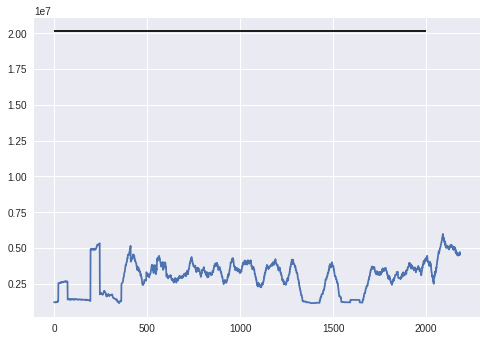

In [335]:
plt.plot(p_err)
plt.hlines(UL, 0, 2000)
plt.show()

In [318]:
anomalies[1].shape

(array([ 196,  197,  198,  199,  200,  201,  202,  203,  204,  205,  206,
         207,  208,  209,  210,  211,  212,  213,  214,  215,  216,  217,
         218,  219,  220,  221,  222,  223,  224,  225,  226,  227,  228,
         229,  230,  231,  232,  233,  234,  235,  236,  237,  238,  239,
         240,  241,  242,  243,  244,  245,  405,  406,  407,  408,  409,
         410,  411,  424,  425,  428,  429,  430,  431,  564,  565, 2067,
        2068, 2069, 2071, 2072, 2073, 2074, 2075, 2076, 2077, 2078, 2079,
        2080, 2081, 2082, 2083, 2084, 2085, 2086, 2087, 2088, 2089, 2090,
        2091, 2092, 2093, 2094, 2095, 2096, 2097, 2098, 2099, 2100, 2101,
        2102, 2103, 2104, 2105, 2106, 2107, 2108, 2109, 2110, 2111, 2112,
        2113, 2114, 2115, 2116, 2117, 2118, 2119, 2120, 2121, 2122, 2123,
        2124, 2125, 2126, 2127, 2128, 2129, 2130, 2131, 2132, 2133, 2134,
        2135, 2136, 2137, 2138, 2139, 2140, 2141, 2142, 2143, 2144, 2145,
        2146, 2147, 2148, 2149, 2150, 

In [0]:
UL = ransomPredict_unscaled.mean() + 3 * ransomPredict_unscaled.std()

In [296]:
ransomPredict_unscaled

array([[ 1.4182887e+07,  5.6679600e+03, -3.9681952e+02,  2.6141120e+06,
         3.8692192e+03],
       [ 1.3079339e+07,  9.9848506e+03,  6.1474213e+02,  2.5246278e+06,
         8.2418838e+03],
       [ 1.4915061e+07,  8.1119277e+03, -8.4249371e+02,  2.7364780e+06,
         9.9070352e+03],
       ...,
       [ 1.2808050e+07,  3.6725366e+03,  2.7314737e+02,  2.5491222e+06,
        -2.4019607e+03],
       [ 2.2658522e+07, -1.0856723e+02,  3.1529058e+03,  4.0393172e+06,
         1.6173998e+04],
       [ 1.5596327e+07,  6.7726919e+03, -9.3543340e+03,  1.0616569e+06,
        -3.5977424e+03]], dtype=float32)

In [0]:
ransomPredict_unscaled.mean()

8323.376

In [0]:
Y1

array([[  529.,    67.,   182., ..., 10317.,    59.,   328.]])

In [0]:
anomalies = np.where(Y1>=UL)

In [298]:
anomalies[0].shape

(2003,)

In [0]:
ransomPredict_unscaled.shape

(2284, 1)

In [0]:
Y1.shape

(1, 2284)

In [0]:
df = pd.DataFrame({'observed':np.array(Y1[0,:]),'predicted':np.array(ransomPredict_unscaled[:,0])})

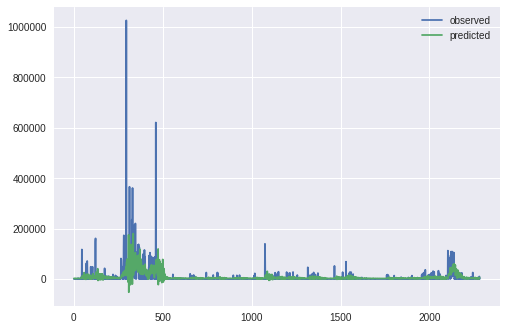

In [0]:
plt.plot(df)
plt.legend(['observed','predicted'])

In [0]:
##### 99  anomalies detected by running on branch-misses